In [1]:
# Library Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
plt.style.use("ggplot")
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,Bidirectional, Activation, LeakyReLU
import datetime
import schedule
import time
import os 

In [2]:
model = keras.models.load_model("test1.h5")

In [3]:
def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the univariate time sequence
        """
    X, y = [], []
    for i in range(len(seq)):
        end = i + n_steps_in
        out_end = end + n_steps_out
        if out_end > len(seq):
            break
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [4]:
def input_create(dat,s):

    dat=dat.reshape(-1)
    if s==1:
        print("ppppppppp")
        train, test = dat[:-25], dat[-25:]
        return train, test
    else:
        print("bbbbbbb")
        train, test = dat[:-30], dat[-30:]
        return train, test


In [5]:
def data_set(s):
    print("start work ......")
    n_steps_in = 25
    n_steps_out = 5
    df = pd.read_csv('final_data.csv')
    df.dropna(inplace=True)
    df.drop_duplicates(subset=['date'], keep='last', inplace=True)
    data = np.array(df['close'].values)
    data = data.reshape(-1,1)
    scaler = MinMaxScaler(feature_range=(0,1))
    
    rescale = scaler.fit_transform(data)
    train,test = input_create(rescale,s)
#     print(len(test))
    #train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], 1)
    if len(test) == 25:
        test_x_1=np.array([test])
        test_x_1 = test_x_1.reshape(test_x_1.shape[0], test_x_1.shape[1], 1)
        print("ccccccccccc")
        return scaler, test_x_1
    else:
        test_x, test_y = split_sequence(list(test), n_steps_in, n_steps_out)
        test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], 1)
        print("DDdddddddd")
        return scaler, test_x,test_y

In [6]:
def prediction():
    s=0
    current_time = datetime.datetime.now()
    plt.figure(figsize=(15,6))
    # Getting predictions by predicting from the last available X variable
    #yhat = model.predict(X[-1].reshape(1, n_per_in, n_features)).tolist()[0]
    # Transforming values back to their normal prices
    if s==0:
        scaler, test_x_1, test_y = data_set(s)
        predi = model.predict(test_x_1)
        yhat = scaler.inverse_transform(np.array(predi).reshape(-1,1)).tolist()
        yhat = [np.round(x,2) for x in yhat]
        print(yhat)
        # Getting the actual values from the last available y variable which correspond to its respective X variable
        actual = scaler.inverse_transform(test_y[-1].reshape(-1,1)).tolist()
        actual = [np.round(x,2) for x in actual]
        print(actual)
        rms = mean_squared_error(actual, yhat, squared=False)
    s+=1    
    scaler, test_x= data_set(1)
    predi_1 = model.predict(test_x)
    yhaat = scaler.inverse_transform(np.array(predi_1).reshape(-1,1)).tolist()
    yhaat = [np.round(x,2) for x in yhaat]
    print(yhaat[0])
    t=yhaat[0]-actual[-1]
    if t > 50:
        print("Buy")
    elif t < -50:
        print("Sell")
    else:
        print("neutral")
    
    # Printing and plotting those predictions
    print("Predicted Prices:\n", yhaat)
    plt.plot(yhaat, label='Predicted')
    plt.title(f"Predicted vs Actual Closing Prices")
    plt.ylabel("Price")
    plt.legend()

start work ......
bbbbbbb
DDdddddddd
[array([53251.41]), array([53244.37]), array([53293.71]), array([53243.73]), array([53248.69])]
[array([53561.]), array([53482.3]), array([53427.58]), array([53411.]), array([53427.73])]
start work ......
ppppppppp
ccccccccccc
[53259.08]
Sell
Predicted Prices:
 [array([53259.08]), array([53251.64]), array([53300.75]), array([53251.79]), array([53256.24])]


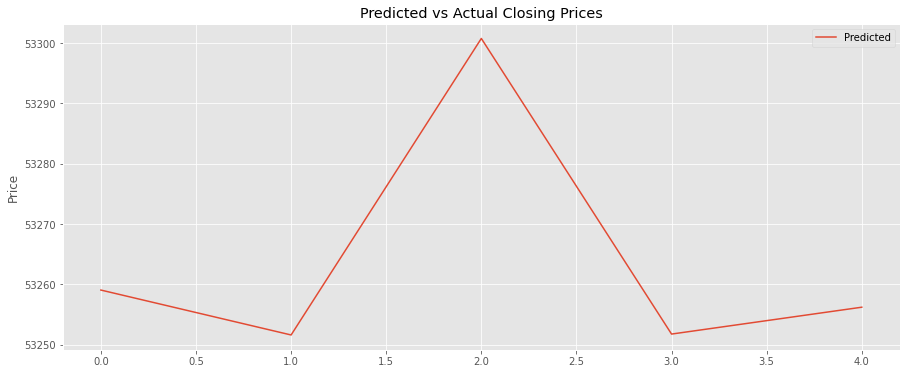

In [7]:
prediction()

In [8]:
def model_predic(stock):
    model = keras.models.load_model("test1.h5")
    def split_sequence(seq, n_steps_in, n_steps_out):
        X, y = [], []
        for i in range(len(seq)):
            end = i + n_steps_in
            out_end = end + n_steps_out
            if out_end > len(seq):
                break
            seq_x, seq_y = seq[i:end], seq[end:out_end]
            X.append(seq_x)
            y.append(seq_y)
        return np.array(X), np.array(y)
    def input_create(dat,s):

        dat=dat.reshape(-1)
        if s==1:
            train, test = dat[:-25], dat[-25:]
            return train, test
        else:
            train, test = dat[:-30], dat[-30:]
            return train, test
    def data_set(s):
        n_steps_in = 25
        n_steps_out = 5
        df = pd.read_csv(stock)
        df.dropna(inplace=True)
        df.drop_duplicates(subset=['date'], keep='last', inplace=True)
        data = np.array(df['close'].values)
        data = data.reshape(-1,1)
        scaler = MinMaxScaler(feature_range=(0,1))

        rescale = scaler.fit_transform(data)
        train,test = input_create(rescale,s)
    #     print(len(test))
        #train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], 1)
        if len(test) == 25:
            test_x_1=np.array([test])
            test_x_1 = test_x_1.reshape(test_x_1.shape[0], test_x_1.shape[1], 1)
            return scaler, test_x_1
        else:
            test_x, test_y = split_sequence(list(test), n_steps_in, n_steps_out)
            test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], 1)
            return scaler, test_x,test_y
    def prediction():
        s=0
        current_time = datetime.datetime.now()
        
  
        if s==0:
            scaler, test_x_1, test_y = data_set(s)
            predi = model.predict(test_x_1)
            yhat = scaler.inverse_transform(np.array(predi).reshape(-1,1)).tolist()
            yhat = [np.round(x,2) for x in yhat]
            # Getting the actual values from the last available y variable which correspond to its respective X variable
            actual = scaler.inverse_transform(test_y[-1].reshape(-1,1)).tolist()
            actual = [np.round(x,2) for x in actual]
            rms = mean_squared_error(actual, yhat, squared=False)
        s+=1    
        scaler, test_x= data_set(1)
        predi_1 = model.predict(test_x)
        yhaat = scaler.inverse_transform(np.array(predi_1).reshape(-1,1)).tolist()
        yhaat = [np.round(x,2) for x in yhaat]
        R=yhaat[0][0]
        t=yhaat[0][0]-actual[-1]
        t=-400
        t=t+rms  
        print(rms)
        print (t)
        if t > 50:
            tt="Buy"
        elif t < -50:
            tt="Sell"
        else:
            tt="neutral"      
        return R,tt
    R,tt=prediction()
    return R,tt

In [9]:
model_predic('final_data.csv')

214.66830432087448
-185.33169567912552


(53259.08, 'Sell')